<a href="https://colab.research.google.com/github/cameronv10/Project-2/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This following project will look at the data for Spotify. The project will attempt to look at and identify any correlations between a number of variables from within the dataset. This include but are not limited to, tempo, energy, liveness, danceability and more. 

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/cameronv10/Project-2/main/data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['energy']]
Y = df['liveness']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:4]  

array([0.15104653, 0.13899044, 0.14751008, 0.13561474])

In [5]:
lm.intercept_

0.08128196607502723

In [6]:
lm.coef_

array([0.16074785])

In [7]:
Z = df[['loudness', 'liveness', 'energy', 'danceability']]
lm.fit(Z, df['tempo'])

LinearRegression()

In [8]:
import seaborn as sns
%matplotlib inline 

(0.0, 227.9046)

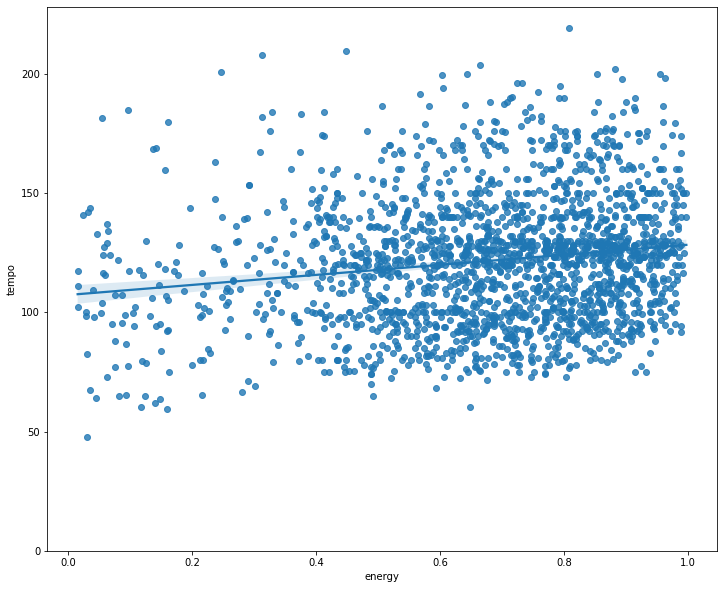

In [9]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="energy", y="tempo", data=df)
plt.ylim(0,)

(0.0, 1.04716)

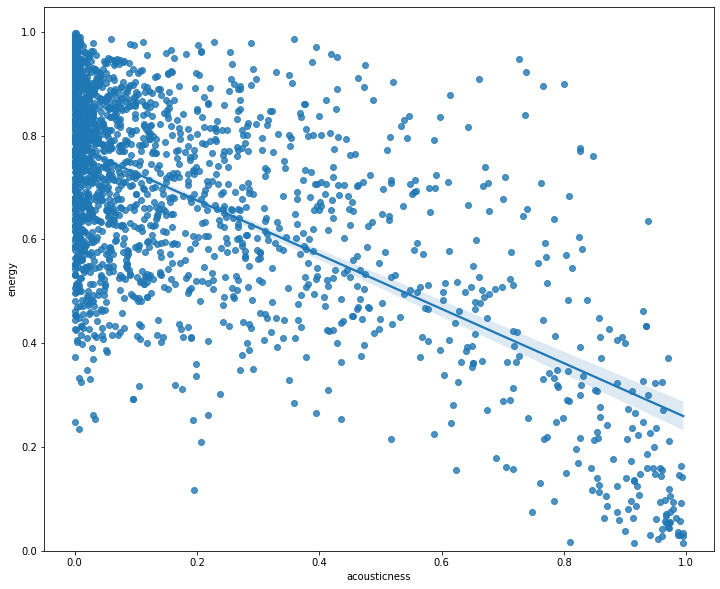

In [10]:
plt.figure(figsize=(width, height))
sns.regplot(x="acousticness", y="energy", data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


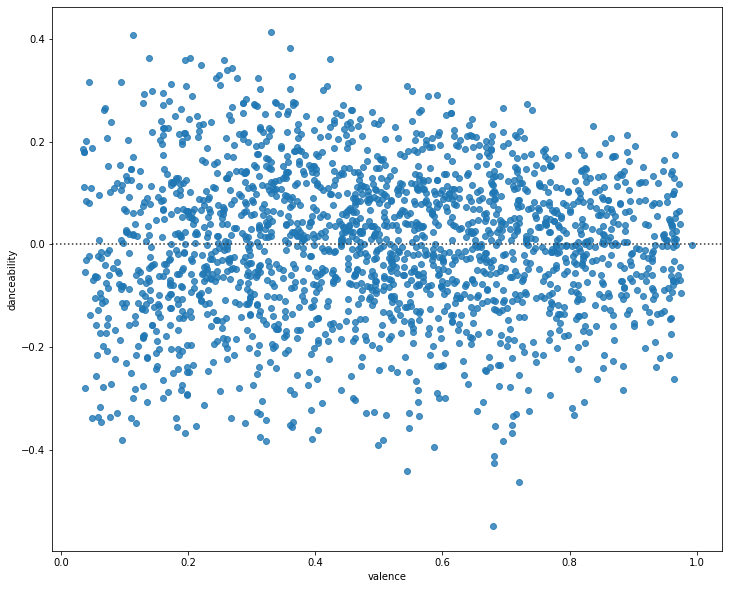

In [11]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['valence'], df['danceability'])
plt.show()

In [12]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


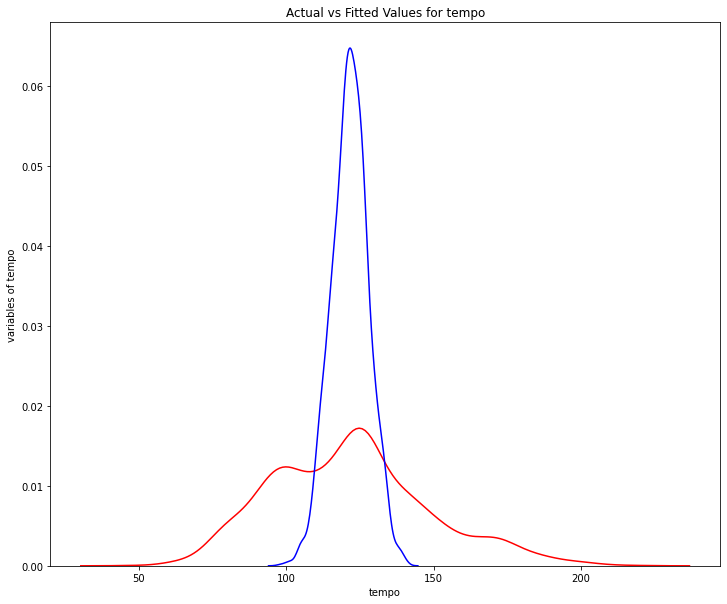

In [13]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['tempo'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for tempo')
plt.xlabel('tempo')
plt.ylabel('variables of tempo')

plt.show()
plt.close()

In [14]:
lm.fit(Z, df['tempo'])
print('The R-square is:', lm.score(Z, df['tempo']))

The R-square is: 0.05645235906434609


In [15]:
X= df[['loudness', 'liveness', 'energy', 'danceability']]

In [16]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [111.40437739 111.94551129 112.19298668 115.40563127]


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mse = mean_squared_error(df['tempo'], Yhat)
print('The mean square error of tempo and predicted value is: ', mse)

The mean square error of tempo and predicted value is:  671.5873822032239


In [19]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for tempo ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('tempo')

    plt.show()
    plt.close()

In [20]:
import numpy as np

In [21]:
x = df['tempo']
y = df['energy']

In [22]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
3.787e-07 x - 0.0001751 x + 0.02671 x - 0.6345


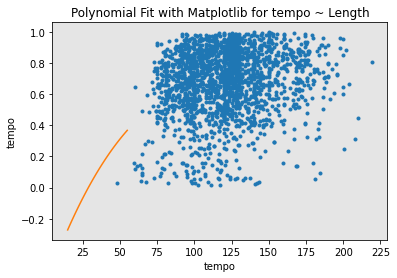

In [23]:
PlotPolly(p, x, y, 'tempo')

In [25]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [26]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('tempo')
    plt.ylabel('danceability')

    plt.show()
    plt.close()

In [27]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
  
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('tempo')
    plt.legend()

In [28]:
y_data = df['tempo']
x_data=df.drop('tempo',axis=1)

In [29]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 202
number of training samples: 1815


In [30]:
from sklearn.linear_model import LinearRegression

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 807
number of training samples: 1210


In [31]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['loudness']], y_train)
lre.score(x_test[['loudness']], y_test)
lre.score(x_train[['loudness']], y_train)

0.022255146359469236

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['loudness']],y_train1)
lre.score(x_test1[['loudness']],y_test1)

0.011360896905014295

In [33]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['loudness']], y_data, cv=4)
Rcross

array([ 0.01302661, -0.00754818,  0.00918975,  0.04851306])

In [34]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.015795311625353053 and the standard deviation is 0.020412429423749972


In [36]:
-1 * cross_val_score(lre,x_data[['loudness']], y_data,cv=4,scoring='neg_mean_squared_error')

array([695.60613129, 586.89963053, 801.66025359, 703.29076826])

In [37]:
Rc=cross_val_score(lre,x_data[['loudness']], y_data,cv=2)
Rc.mean()

0.01509698601704651

In [38]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['loudness']], y_data,cv=4)
yhat[0:5]

array([119.6661146 , 117.88367468, 121.4940589 , 112.51748726,
       116.49967557])

In [40]:
lr = LinearRegression()
lr.fit(x_train[['liveness', 'valence', 'loudness', 'danceability']], y_train)

LinearRegression()

In [41]:
yhat_train = lr.predict(x_train[['liveness', 'valence', 'loudness', 'danceability']])
yhat_train[0:5]

array([112.42079994, 125.07146009, 122.30774994, 118.38430872,
       119.57687827])

In [42]:
yhat_test = lr.predict(x_test[['liveness', 'valence', 'loudness', 'danceability']])
yhat_test[0:5]

array([124.07831092, 127.18530151, 123.8932577 , 123.95311501,
       125.28206609])

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


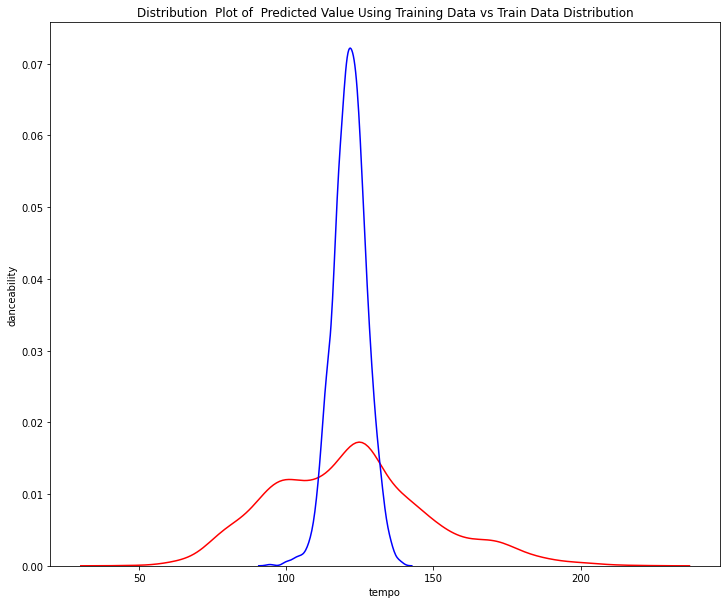

In [44]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Train Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


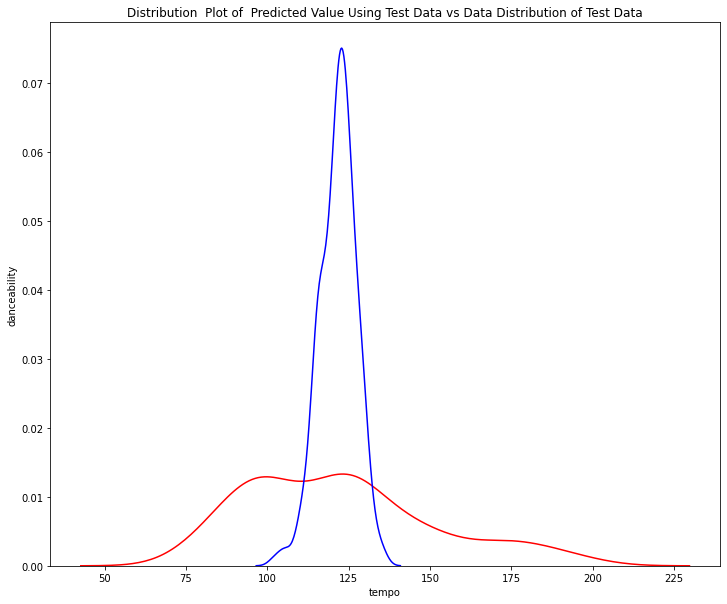

In [45]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [48]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['loudness']])
x_test_pr = pr.fit_transform(x_test[['loudness']])
pr

PolynomialFeatures(degree=5)

In [49]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [50]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([119.80741622, 129.25397889, 121.35546598, 119.59038219,
       110.43482942])

In [51]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [119.80741622 129.25397889 121.35546598 119.59038219]
True values: [168.039 139.963 112.977 123.98 ]


In [52]:
poly.score(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

0.024853898978147937

In [53]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['loudness']])

x_test_pr = pr.fit_transform(x_test[['loudness']])    

lr.fit(x_train_pr, y_train)
yhat_test=lr.predict(x_test_pr)
yhat_train=lr.predict(x_train_pr)
mse_test= [mean_squared_error(y_test, yhat_test)]
mse_train = mean_squared_error(y_train, yhat_train)
mse_test.append(mse_test)
mse_test

[722.1643834260165, [...]]

722.2972564871786 order = 1
722.1643834260165 order = 2
721.9319810374467 order = 3
720.8259917721527 order = 4
720.2605012031597 order = 5
723.2480398094488 order = 6
731.6676559586658 order = 7
786.5070983525255 order = 8
1409.433767433696 order = 9
2591.5636273791874 order = 10


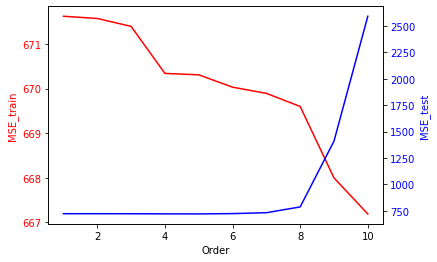

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
mse_test_list = []
mse_train_list = []
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in order:
    #polynomial transformation
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['loudness']])
    x_test_pr = pr.fit_transform(x_test[['loudness']])    
    
    lr.fit(x_train_pr, y_train) #estimate optimal model parameters
    yhat_test=lr.predict(x_test_pr) #make predictions using model params for test y
    yhat_train=lr.predict(x_train_pr) #make predictions using model params for training y
    mse_test= mean_squared_error(y_test, yhat_test) #calculate MSE for test set
    mse_train = mean_squared_error(y_train, yhat_train) #calculate MSE for training set
    mse_test_list.append(mse_test) #append to list
    mse_train_list.append(mse_train) #append to list
    print(str(mse_test)+' '+'order = '+str(n))

# plot using two axis - this eliminates visual problems of different scales, should it exist
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Order') 
ax1.set_ylabel('MSE_train', color = 'red') 
ax1.plot(order, mse_train_list, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('MSE_test', color = 'blue') 
ax2.plot(order, mse_test_list, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

In [58]:
from sklearn.linear_model import Ridge

In [59]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=-2.52, Train Score=0.0327]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.56189e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=-2.14, Train Score=0.0325]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.36364e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=-2.12, Train Score=0.0325]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.99241e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
  0%|          | 0/1000 [00:00<?, ?it/s, Test Score=-2.11, Train Score=0.0325]/usr/local/li